### Creating a Neural Network using built in module

* Key Components of nn module of torch

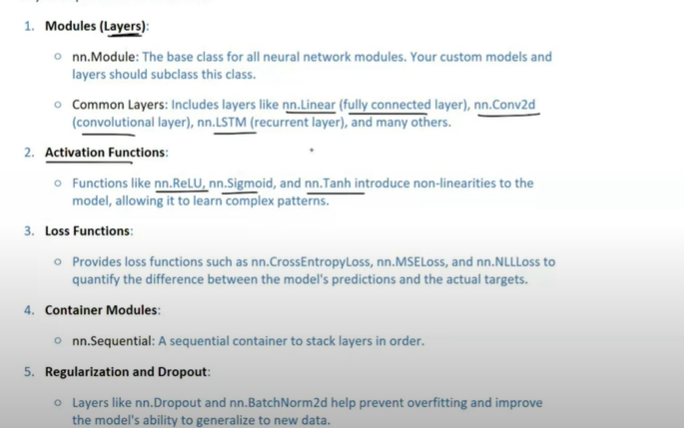

In [7]:
import torch
import torch.nn as nn

class Model(nn.Module):
    def __init__(self, num_features):
        super().__init__()
        #creating a single nueron
        self.linear = nn.Linear(num_features,1)
        #creating sigmoid function
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, features):
        out = self.linear(features)
        out = self.sigmoid(out)
        
        return out

In [9]:
#create dataset 
features = torch.rand(10,5)
#create model
#passing numbers of features in model
model = Model(features.shape[1])
#call model for forward pass

#this will call forward automatically using magic function
model(features)


tensor([[0.4351],
        [0.4521],
        [0.4575],
        [0.4592],
        [0.4134],
        [0.4782],
        [0.4557],
        [0.4063],
        [0.4259],
        [0.5156]], grad_fn=<SigmoidBackward0>)

In [10]:
model.linear.weight

Parameter containing:
tensor([[-0.2836,  0.2620,  0.1821,  0.2185, -0.1829]], requires_grad=True)

In [11]:
model.linear.bias

Parameter containing:
tensor([-0.2857], requires_grad=True)

In [12]:
!pip install torchinfo

In [13]:
from torchinfo import summary
summary(model, input_size=(10,5))


Layer (type:depth-idx)                   Output Shape              Param #
Model                                    [10, 1]                   --
├─Linear: 1-1                            [10, 1]                   6
├─Sigmoid: 1-2                           [10, 1]                   --
Total params: 6
Trainable params: 6
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

### Creating a new Neural Network
* This has 5 inputs in first layer and hidden layer have 3 inputs

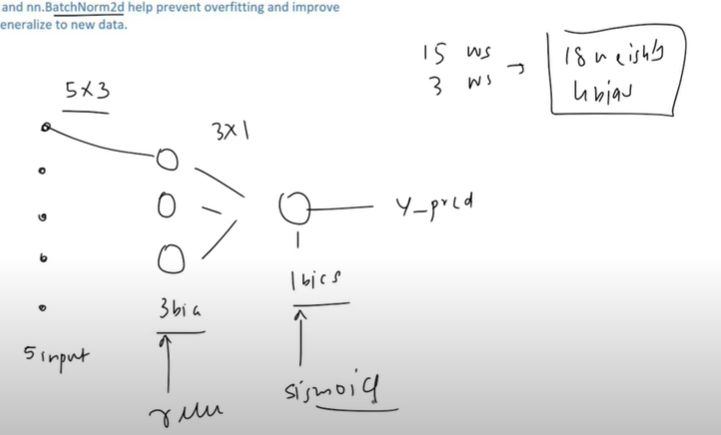

In [14]:
import torch
import torch.nn as nn

class Model(nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.linear1 = nn.Linear(num_features,3)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(3, 1)
        self.sigmoid = nn.Sigmoid()

    
    def forward(self, features):
        out = self.linear1(features)
        out = self.relu(out)
        out = self.linear2(out)
        out = self.sigmoid(out)

        return out

In [ ]:
#working of model
# [[f1, f2, f3, f4, f5],
#  [f1, f2, f3, f4, f5],
#   ...
#  [f1, f2, f3, f4, f5]]  # 10 rows total

features = torch.rand(10,5)

model = Model(features.shape[1])

model(features)

tensor([[0.5740],
        [0.5941],
        [0.5659],
        [0.5620],
        [0.5805],
        [0.5929],
        [0.6107],
        [0.5892],
        [0.5908],
        [0.6081]], grad_fn=<SigmoidBackward0>)

In [26]:
model.linear1.weight

Parameter containing:
tensor([[-0.1055,  0.2078,  0.2875, -0.3341, -0.0474],
        [-0.0888, -0.0299, -0.2595, -0.0984, -0.3930],
        [ 0.3454,  0.2344,  0.3509,  0.2316,  0.0662]], requires_grad=True)

In [27]:
model.linear1.bias

Parameter containing:
tensor([ 0.3299, -0.0555,  0.4462], requires_grad=True)

In [28]:
summary(model, input_size=(10,5))

Layer (type:depth-idx)                   Output Shape              Param #
Model                                    [10, 1]                   --
├─Linear: 1-1                            [10, 3]                   18
├─ReLU: 1-2                              [10, 3]                   --
├─Linear: 1-3                            [10, 1]                   4
├─Sigmoid: 1-4                           [10, 1]                   --
Total params: 22
Trainable params: 22
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [30]:
# now creating a sequential container

import torch
import torch.nn as nn

class Model(nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(num_features, 3),
            nn.ReLU(),
            nn.Linear(3,1),
            nn.Sigmoid()

        )
    
    def forward(self, features):
        out = self.network(features)
        
        return out

In [31]:
#working of model
# [[f1, f2, f3, f4, f5],
#  [f1, f2, f3, f4, f5],
#   ...
#  [f1, f2, f3, f4, f5]]  # 10 rows total

features = torch.rand(10,5)

model = Model(features.shape[1])

model(features)

tensor([[0.5598],
        [0.5914],
        [0.5344],
        [0.5454],
        [0.5724],
        [0.5321],
        [0.5649],
        [0.5326],
        [0.5207],
        [0.5057]], grad_fn=<SigmoidBackward0>)